<br />

# Exploring the FEC 2016 Elections Data

## Business Analytics Practicum I

## 1st Assignment


---

> Anastasios Theodorou, Student <br />
> Master of Science in Business Analytics <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> AM: p2822007


## Introduction

  ### Definitions 

<b>Political Action Committee (PAC)</b>
> A political committee which has aim to raise and spend money for electing and defeating candidates. 
> Most of them represent business, labor or ideological interests. <br /><br />
>>PAC can give:
>> <ul>
>> <li>\$5,000 to a candidate committee per election. </li>
>> <li>up to \$15,000 annually to any national party committee</li>
>> <li>\$5,000 annually to any other PAC</li>
>> </ul>
>> <i>PACs may receive up to \$5,000 from any one individual, PAC or party committee per calendar year.</i>

<b> Super PAC </b>

> A type of PAC was designed in 2010 with no limits or restrictions on the sources of funds that may be used. These PACs make no contributions to candidates or parties, but they may create independent expenditures in federal races, run ads, send mails or communicate in other ways with messages that specifically advocate the election or defeat of a specific candidate.

<b>Hybrid PACs </b>

> They are political committees with non-contribution accounts. They can accept unlimited contributions from individuals, corporations, labor organizations and other political committees to a bank account for the purpose of financing independent expenditures, or other actions that refer to a federal candidate, and generic voter drives in federal elections.

<b>Leadership PACs</b>

>They are political committees that are directly or indirectly established, financed, maintained or controlled by a candidate or an individual holding federal office.  
>>Members of Congress and other political leaders often establish Leadership PACs in order to support candidates for various federal and nonfederal offices.

### Useful Graphs

>In this section will be provided some useful graphs to take a picture on the money that have been raised and spent for the specific year (2016) where the elections took place. <br />
>>__[Link for the below Graphs](https://www.fec.gov/data/browse-data/?tab=raising)__

---
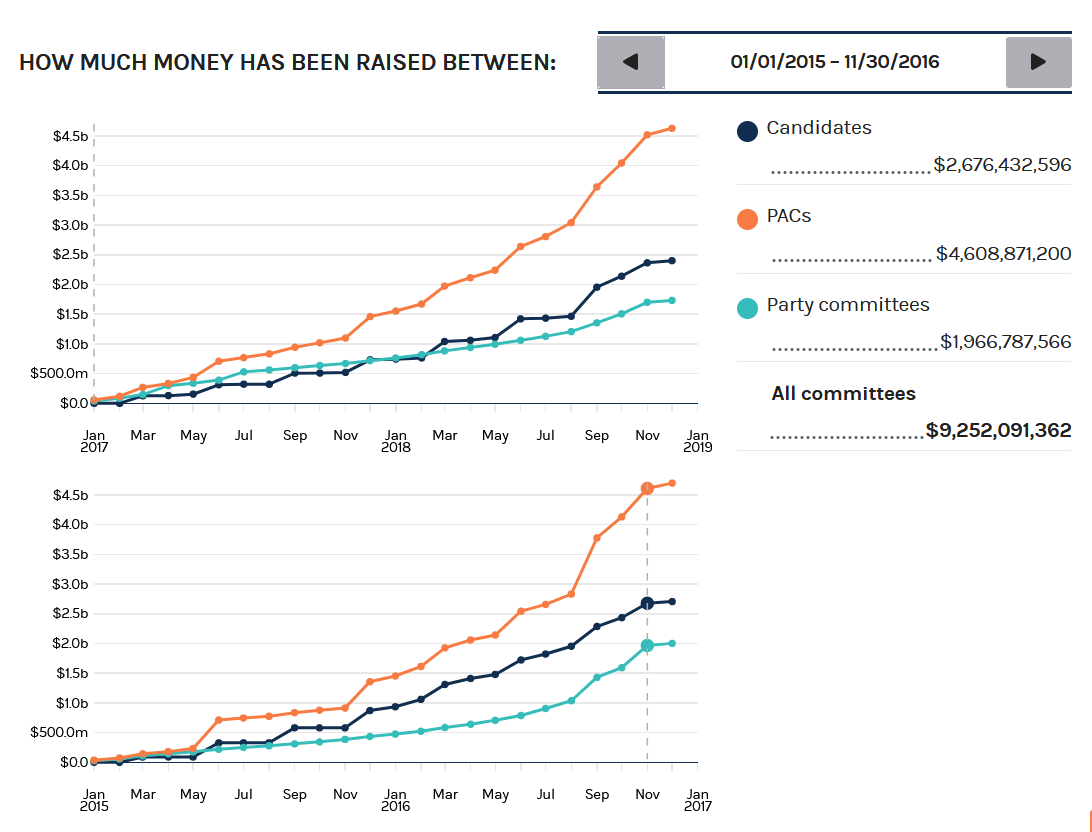

From the above graphs we can easily observe that there is some kind of pattern on the money raised for candidates, PACs and party committes, because for the periods 2015-2016 and 2017-2018 the funds were raised in odd years were minimum comparing to the even years, where the funds follow an exponential distribution. This is happening because of the political campaigns in both these two years. We know that in 2016 there had been held the U.S. presidential elections, while in 2018 were held midterm elections (these are held near the midpoint of a president's four-year term). <br />
Also, we can infer from the graphs that these three lines have a peak near the date of the elections (8th  of November). <br />
As far as the PACs are concerned after the August 2016 and until the elections of 2016, the money that had been raised were almost doubled and they reached to an amount of above 4.5 bil. \$. 

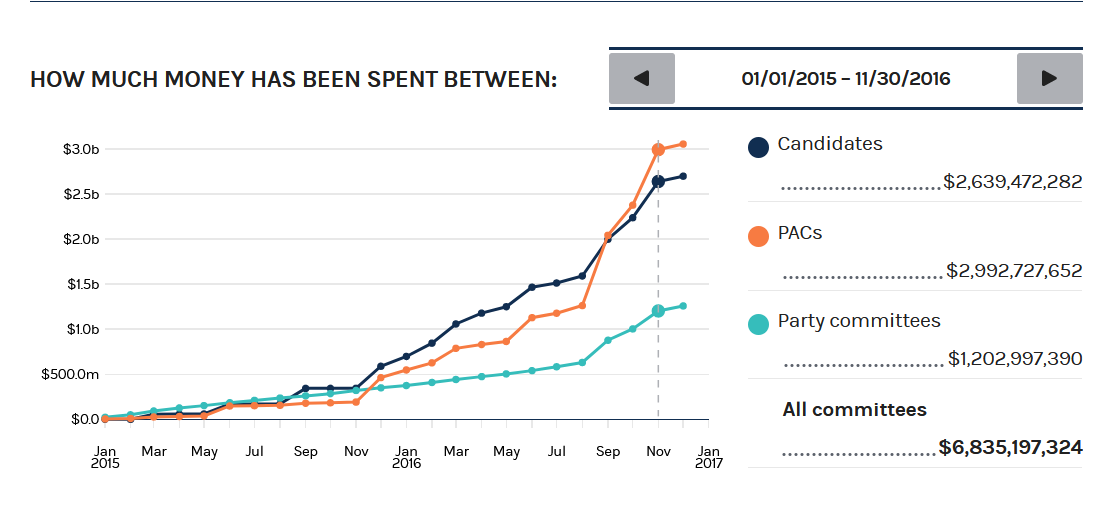

The above graph shows us the money that have been spent in the period of 2015-2016 where the U.S. presidential elections were held. We can observe that after the January of 2016 there is an exponential increase of how the money have been spent and this is why after this month probably each campaign starts. <br />
So, as we saw in the first graph the parties have been raised more money and as a result a proportion of them have been spent in various actions (advertising, media, travel expenses etc). The peak is also, near the date of the election (8th of November). Again, we can infer that concerning the PACs' money, because of the fact that after August 2016 had been raised a serious amount of money, we can see and here that a proportionate amount of money have been spent as well, having the same tremendous increase.

## Cleaning & Transforming the Data

In this part of our project we are going to find and get the wanted data and after that we are going to edit them in order to be able to handle them in later computations.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

import matplotlib.ticker as ticker

from collections import defaultdict

%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)

<b> Contributions from Committees to Candidates & Independent Expenditures</b>
*  We read the headers for the dataframe that we will create later on, in this link: __[Headers](https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv)__ 

In [2]:
headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv')
headers_df
headers = headers_df.columns.tolist()

* Then we downloaded the wanted data from the FEC website (__[Contributions from Committees to Candidates](https://www.fec.gov/files/bulk-downloads/2016/pas216.zip)__) and then we unzip this file into our directory. These data contain each contribution or independent expenditure made by a PAC, party committee, candidate committee, or other federal committee to a candidate during the years 2015 and 2016.<br /> 
* Finally, we created a dataframe called "com_to_cand" (<i> the error is referring to the type of columns which is getting fixed later on </i> ).

In [3]:
com_to_cand = pd.read_csv('itpas2.txt', sep="|", index_col=False, names=headers)
com_to_cand.head(5)

C:\Users\tasso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10,11,12,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00548198,N,M3,G2016,15950887602,24K,CCM,BLAINE FOR CONGRESS,JEFFERSON CITY,MO,65102,NaN,NaN,2102015.0,2500,C00458679,H8MO09153,6783511,998835,NaN,NaN,4032020151240895091
1,C00235739,N,M3,P2014,15950887798,24K,CCM,DAN NEWHOUSE FOR CONGRESS,YAKIMA,WA,98909,NaN,NaN,2052015.0,2500,C00559393,H4WA04104,B544444,998836,NaN,NaN,4032020151240895118
2,C00235739,N,M3,P2016,15950887799,24K,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,SPOKANE,WA,99210,NaN,NaN,2182015.0,1000,C00390476,H4WA05077,B544838,998836,NaN,NaN,4032020151240895120
3,C00235739,N,M3,G2018,15950887799,24K,CCM,MANCHIN FOR WEST VIRGINIA,WASHINGTON,DC,20002,NaN,NaN,2052015.0,1000,C00486563,S0WV00090,B544441,998836,NaN,NaN,4032020151240895121
4,C00235739,N,M3,P2016,15950887790,24K,CCM,PETE AGUILAR FOR CONGRESS,WASHINGTON,DC,20003,NaN,NaN,2182015.0,1500,C00510461,H2CA31125,B544833,998836,NaN,NaN,4032020151240895094


* We transformed the types of our data into string, except from the "Transaction Amount" which is float and want it for further calculations.

In [4]:
data_types = { header: np.str for header in headers }
data_types['TRANSACTION_AMT'] = np.float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'CAND_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

* The final data.

In [5]:
com_to_cand = pd.read_csv('itpas2.txt', sep="|", index_col=False, names=headers, dtype=data_types)
print(com_to_cand.shape)
com_to_cand.sample(5)

(516394, 22)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
376363,C90011156,N,YE,G2016,201701319042160610,24E,IND,"BALDWIN, JACOB",PHILADELPHIA,PA,191042351,NaN,NaN,09292016,68.0,P00003392,P00003392,VN7CZA47P75,1144686,NaN,NaN,4020920171370110571
235626,C90011156,N,Q3,G2016,201610129032250638,24A,IND,"MOODIE, KAYCI",PHILADELPHIA,PA,191382711,NaN,NaN,08112016,44.0,P80001571,P80001571,VN7CZA27SG0,1104329,NaN,NaN,4101320161340912050
39756,C00142711,N,M7,G2016,201507169000250123,24K,CCM,FRIENDS OF CHERI BUSTOS,WASHINGTON,DC,20036,NaN,NaN,06242015,1000.0,C00498568,H2IL17071,107F2100FD61A7DD1B1,1016002,NaN,NaN,4071720151247465369
111933,C00004275,N,M10,P2016,201510199003104494,24K,COM,FREDERICA S. WILSON FOR CONGRESS,MIAMI GARDENS,FL,33169,NaN,NaN,09142015,2000.0,C00460055,H0FL17068,B3F6C173B871E4F4E9A2,1029969,NaN,NaN,4101920151256043436
506158,C90013285,A,Q3,G2016,201706169058919105,24A,ORG,AMERICANS FOR PROSPERITY,ARLINGTON,VA,22201,NaN,NaN,08082016,671.0,S6NV00200,S6NV00200,F57.4735,1166228,NaN,NaN,4061920171410147380


<b> Contributions by Individuals</b>
* We will also need the  individual contributions file, which contains each contribution from an individual to a federal committee. So, we follow again the same procedure. <br /> *Headers: __[Headers](https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv)__ <br /> *Dataset: __[Contributions by Individuals](https://www.fec.gov/files/bulk-downloads/2016/indiv16.zip)__

In [6]:
indi_headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv')
indi_headers_df
indi_headers = indi_headers_df.columns.tolist()
indi_headers

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

* Because the file was too big and contained up to 20 million rows of data, we proccessed it through Unix tools. So, we used the below command to create a smaller file with the data only from General elections, those we are interested most. (The "itcont.txt" is the file after unzipping the main file which was downloaded from the FEC website.) <br />
<p><code>awk -F '|' '{if ( $4 == "G" ) print $0 }' itcont.txt > cont.txt</code></p>

In [7]:
indi = pd.read_csv('cont.txt', sep="|", index_col=False, nrows=10, names=indi_headers)
indi.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00344051,N,Q1,G,15020144424,15,IND,"OLDAKER, WILLIAM C",WASHINGTON,DC,20006,OLDAKER BIDEN & BELAIR,ATTORNEY,2022015,2600,NaN,SA050615442423,1006768,NaN,NaN,2050620151243654928
1,C00344051,N,Q1,G,15020144420,15,IND,"DWYER, ROBERT",PALM BEACH,FL,33480,SELF,PRIVATE INVESTOR,1122015,2400,NaN,SA050615442010,1006768,NaN,NaN,2050620151243654915
2,C00344051,N,Q1,G,15020144422,15,IND,"JOHNSON, GLORIA",CLERMONT,FL,34711,NONE,RETIRED,1122015,2400,NaN,SA050615442218,1006768,NaN,NaN,2050620151243654923
3,C00498907,N,Q1,G,15020144409,22Y,IND,"SHOEMAKER, J RICHARD",CAMBRIDGE,NE,69022,NaN,NaN,1312015,300,NaN,SB0506154409157,1006719,NaN,NaN,2050720151243666191
4,C00498907,N,Q1,G,15020144366,15,IND,"SHOEMAKER, J RICHARD",CAMBRIDGE,NE,690220038,PINPOINT HOLDINGS,MANAGEMENT,1232015,2000,NaN,SA050615436632,1006719,NaN,CONTRIBUTION REFUNDED $300.00 ON 01/31/2015,2050720151243663566


In [8]:
data_types = { header: np.str for header in indi_headers }
data_types['TRANSACTION_AMT'] = np.float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

In [9]:
indi = pd.read_csv('cont.txt', sep="|", index_col=False, names=indi_headers, dtype=data_types)
print(indi.shape)
indi.sample(5)

(27330, 21)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
21981,C00574889,A,Q1,G,201604190200144864,15,IND,"PARISH, RICHARD L III",WHEATON,IL,601897838,NATIONWIDE GAGE CALIBRATION,GENERAL MANAGER,03162016,5.0,NaN,SA05021648642683,1066886,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,1070620160028217596
10684,C00346312,N,Q3,G,201510200200288448,15,IND,"SMITH, MICHAEL S",BOULDER,CO,80302,KALTAR RESOURCES,CONSULTANT,07232015,2700.0,NaN,SA1105158448119,1031857,NaN,NaN,2110520151256874346
20269,C00573212,A,Q1,G,201604180200126076,15,IND,"EUGENIS, CHRISTY",PORTLAND,OR,972102614,"NEW VILLAGES GROUP, LTD",OWNER,03302016,2500.0,NaN,SA05101660762345,1066959,NaN,NaN,1100520160031971913
26480,C00571737,N,Q1,G,201604150200104625,15,IND,"LUCARELLI, JASON S",CLEVELAND,OH,441152755,MINUTEMAN STAFFING,PRESIDENT & CEO,03042016,2700.0,NaN,SA0429164625139,1066865,X,MEMO ITEM,2042920161284592833
24202,C00346312,N,Q1,G,201604200200152043,15,IND,"SCHWARTZ, JONATHAN",CHAPPAQUA,NY,10514,UNIVISION COMMUNICATIONS INC.,GENERAL COUNSEL,03052016,1000.0,NaN,SA0512162043171,1067154,NaN,NaN,2051220161292607104


<b> Operating Expenditures </b>
* We will need the "Operating expenditures" file that contains information about disbursements disclosed on FEC reports, including operating expenditures. This file is useful because as it was mentioned in the Introduction a Super PAC may contribute to a party through expenditures or other actions. So, for processing we follow again the same steps as we did above with the other datasets. <br /> *Headers: __[Headers](https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv)__ <br /> *Dataset: __[Operating Expenditures](https://www.fec.gov/files/bulk-downloads/2016/oppexp16.zip)__


In [10]:
oper_headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv')
oper_headers = oper_headers_df.columns.tolist()
oper_headers

['CMTE_ID',
 'AMNDT_IND',
 'RPT_YR',
 'RPT_TP',
 'IMAGE_NUM',
 'LINE_NUM',
 'FORM_TP_CD',
 'SCHED_TP_CD',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'TRANSACTION_PGI',
 'PURPOSE',
 'CATEGORY',
 'CATEGORY_DESC',
 'MEMO_CD',
 'MEMO_TEXT',
 'ENTITY_TP',
 'SUB_ID',
 'FILE_NUM',
 'TRAN_ID',
 'BACK_REF_TRAN_ID']

In [11]:
oper = pd.read_csv('oppexp.txt', sep="|", index_col=False, nrows=10, names=oper_headers)
oper.head(5)

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
0,C00415182,N,2015,Q1,15951142498,17,F3,SB,CHASE CARDMEMBER SERVICE,WILMINGTON,DE,198865153,02/21/2015,3301.24,P2016,CREDIT CARD PAYMENT,1,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4041520151241882404,1002978,VN81E9TS8X8,NaN
1,C00415182,N,2015,Q1,15951142495,17,F3,SB,GOOGLE INC.,SAN FRANCISCO,CA,941390001,01/21/2015,56.42,P2016,INTERNET SERVICE,1,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882396,1002978,VN81E9TQB00,VN81E9TQAP1
2,C00415182,N,2015,Q1,15951142495,17,F3,SB,LINKEDIN CORPORATION,MOUNTAIN VIEW,CA,94043,01/21/2015,49.95,P2016,INTERNET SERVICE,1,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882397,1002978,VN81E9TQB76,VN81E9TQAP1
3,C00415182,N,2015,Q1,15951142496,17,F3,SB,NATIONBUILDER,LOS ANGELES,CA,900131155,01/21/2015,99.00,P2016,INTERNET SERVICE,1,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882398,1002978,VN81E9TS9X1,VN81E9TQAP1
4,C00415182,N,2015,Q1,15951142496,17,F3,SB,"NGP VAN, INC.",WASHINGTON,DC,20005,01/21/2015,2000.00,P2016,INTERNET SERVICE,1,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882399,1002978,VN81E9TQAX7,VN81E9TQAP1


In [12]:
data_types = { header: np.str for header in oper_headers }
data_types['TRANSACTION_AMT'] = np.float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_YR': str,
 'RPT_TP': str,
 'IMAGE_NUM': str,
 'LINE_NUM': str,
 'FORM_TP_CD': str,
 'SCHED_TP_CD': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'TRANSACTION_PGI': str,
 'PURPOSE': str,
 'CATEGORY': str,
 'CATEGORY_DESC': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'ENTITY_TP': str,
 'SUB_ID': str,
 'FILE_NUM': str,
 'TRAN_ID': str,
 'BACK_REF_TRAN_ID': str}

In [13]:
oper = pd.read_csv('oppexp.txt', sep="|", index_col=False, names=oper_headers, dtype=data_types)
print(oper.shape)
oper.head(5)

(1749832, 25)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
0,C00415182,N,2015,Q1,15951142498,17,F3,SB,CHASE CARDMEMBER SERVICE,WILMINGTON,DE,198865153,02/21/2015,3301.24,P2016,CREDIT CARD PAYMENT,001,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4041520151241882404,1002978,VN81E9TS8X8,NaN
1,C00415182,N,2015,Q1,15951142495,17,F3,SB,GOOGLE INC.,SAN FRANCISCO,CA,941390001,01/21/2015,56.42,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882396,1002978,VN81E9TQB00,VN81E9TQAP1
2,C00415182,N,2015,Q1,15951142495,17,F3,SB,LINKEDIN CORPORATION,MOUNTAIN VIEW,CA,94043,01/21/2015,49.95,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882397,1002978,VN81E9TQB76,VN81E9TQAP1
3,C00415182,N,2015,Q1,15951142496,17,F3,SB,NATIONBUILDER,LOS ANGELES,CA,900131155,01/21/2015,99.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882398,1002978,VN81E9TS9X1,VN81E9TQAP1
4,C00415182,N,2015,Q1,15951142496,17,F3,SB,"NGP VAN, INC.",WASHINGTON,DC,20005,01/21/2015,2000.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882399,1002978,VN81E9TQAX7,VN81E9TQAP1


* We select those, which has been executed in 2016.

In [14]:
oper = oper[oper['RPT_YR'].str.contains('2016')]
print(oper.shape)
oper.head(5)

(1110175, 25)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
293388,C00301838,N,2016,12P,201603039009643027,17,F3,SB,"ARISTOTLE INTERNATIONAL, INC.",WASHINGTON,DC,200031164,01/21/2016,500.0,P2016,SOFTWARE AND SUPPORT,NaN,NaN,NaN,NaN,ORG,4030420161276067750,1053182,BAFF0A7A0E2174E2EB31,NaN
293389,C00301838,N,2016,12P,201603039009643028,17,F3,SB,HAMILTON COUNTY REPUBLICAN PARTY,CINCINNATI,OH,45202,01/28/2016,250.0,P2016,LINCOLN DAY DINNER AD,NaN,NaN,NaN,NaN,COM,4030420161276067751,1053182,B19ED1BC9D90B41EDA41,NaN
293393,C00301838,N,2016,12P,201603039009643025,17,F3,SB,MT. AIRY PROPERTIES,CINCINNATI,OH,45239,01/04/2016,1421.0,P2016,RENT,NaN,NaN,NaN,NaN,ORG,4030420161276067742,1053182,B27436FA8FA1845B28A0,NaN
293394,C00301838,N,2016,12P,201603039009643025,17,F3,SB,HARRIS DISTRIBUTING,CINCINNATI,OH,45232,01/04/2016,450.0,P2016,STORAGE PAYMENT,NaN,NaN,NaN,NaN,ORG,4030420161276067743,1053182,BF7AC39DA8E9741F6A52,NaN
293395,C00301838,N,2016,12P,201603039009643025,17,F3,SB,HAMILTON COUNTY REPUBLICAN PARTY,CINCINNATI,OH,45202,01/06/2016,680.0,P2016,LINCOLN DAY DINNER TICKETS,NaN,NaN,NaN,NaN,COM,4030420161276067744,1053182,BE04F13706EFA4E3E867,NaN


* From the description of the file the lines referred to PACs are those which start from '21' \[__[Operating expenditures file description](https://www.fec.gov/campaign-finance-data/operating-expenditures-file-description/)__ \]. So, we select those.

In [15]:
oper_pac = oper[oper['LINE_NUM'].str.contains('21')]
print(oper_pac.shape)
oper_pac.head(5)

(348177, 25)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
1155958,C00370007,N,2016,M3,201603199009817017,21B,F3X,SB,U.S. POSTMASTER,BURLINGTON,VT,05402,01/13/2016,19.30,NaN,SHIPPING/OVERNIGHT EXPENSE,NaN,NaN,X,NaN,ORG,4032120161276607438,1056666,FEB2016-00226,NaN
1155959,C00370007,N,2016,M3,201603199009817018,21B,F3X,SB,U.S. POSTMASTER,BURLINGTON,VT,05402,01/15/2016,5.05,NaN,SHIPPING/OVERNIGHT EXPENSE,NaN,NaN,X,NaN,ORG,4032120161276607439,1056666,FEB2016-00227,NaN
1155960,C00370007,N,2016,M3,201603199009817018,21B,F3X,SB,U.S. POSTMASTER,BURLINGTON,VT,05402,01/15/2016,18.11,NaN,SHIPPING/OVERNIGHT EXPENSE,NaN,NaN,X,NaN,ORG,4032120161276607440,1056666,FEB2016-00228,NaN
1155961,C00370007,N,2016,M3,201603199009817018,21B,F3X,SB,UNITED AIRLINES,ROSEMONT,IL,60018,01/12/2016,673.20,NaN,AIRFARE,NaN,NaN,X,NaN,ORG,4032120161276607441,1056666,FEB2016-00229,NaN
1155962,C00370007,N,2016,M3,201603199009817012,21B,F3X,SB,LOWE'S,S BURLINGTON,VT,05403,01/07/2016,200.00,NaN,OFFICE SUPPLIES,NaN,NaN,X,NaN,ORG,4032120161276607422,1056666,FEB2016-00210,NaN


<b> Committee Master </b>
* We will need the committee master file that contains one record for each committee registered to the Federal Election Commission. So, we follow again the same steps as we did above with the other datasets. <br /> *Headers: __[Headers](https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv)__ <br /> *Dataset: __[Committee Master](https://www.fec.gov/files/bulk-downloads/2016/cm16.zip)__

In [16]:
cm_headers_df =  pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv')
cm_headers_df
cm_headers = cm_headers_df.columns.tolist()
cm_headers

['CMTE_ID',
 'CMTE_NM',
 'TRES_NM',
 'CMTE_ST1',
 'CMTE_ST2',
 'CMTE_CITY',
 'CMTE_ST',
 'CMTE_ZIP',
 'CMTE_DSGN',
 'CMTE_TP',
 'CMTE_PTY_AFFILIATION',
 'CMTE_FILING_FREQ',
 'ORG_TP',
 'CONNECTED_ORG_NM',
 'CAND_ID']

In [17]:
cm = pd.read_csv('cm.txt', sep="|", index_col=False, names=cm_headers)
print(cm.shape)
cm.tail(5)

(17651, 15)


,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
17646,C90017245,FRANCISCO AGUILAR,NaN,231 STATE STREET APT 303,NaN,HARRISBURG,PA,17101,U,I,NaN,Q,NaN,NaN,NaN
17647,C90017336,"LUDWIG, EUGENE",NaN,2620 FOXHALL RD. NW,NaN,WASHINGTON,DC,20007,U,I,NaN,Q,NaN,NaN,NaN
17648,C90017542,CENTER FOR POPULAR DEMOCRACY ACTION,NaN,449 TROUTMAN AVE SUITE A,NaN,BROOKLYN,NY,11237,U,I,NaN,Q,NaN,NaN,NaN
17649,C99002396,AMERICAN POLITICAL ACTION COMMITTEE,"VERSNEL, J.H.",PO BOX 1682,NaN,BELLEVUE,WA,98009,U,Q,NaN,Q,M,NONE,NaN
17650,C99003428,THIRD DISTRICT REPUBLICAN PARTY,TOM W BRENEMAN,PO BOX 36,NaN,EAU CLAIRE,WI,547020036,U,Y,REP,Q,NaN,NaN,NaN


<b> Candidate Master </b>
* We couldn't skip the candidate dataset, the one which contains one record for each candidate who participated in the elections of 2016. So, we follow again the same procedure as we did above with the other datasets. <br /> *Headers: __[Headers](https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv)__ <br /> *Dataset: __[Candidate Master](https://www.fec.gov/files/bulk-downloads/2016/cn16.zip)__

In [18]:
cd_headers_df =  pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv')
cd_headers_df
cd_headers = cd_headers_df.columns.tolist()
cd_headers

['CAND_ID',
 'CAND_NAME',
 'CAND_PTY_AFFILIATION',
 'CAND_ELECTION_YR',
 'CAND_OFFICE_ST',
 'CAND_OFFICE',
 'CAND_OFFICE_DISTRICT',
 'CAND_ICI',
 'CAND_STATUS',
 'CAND_PCC',
 'CAND_ST1',
 'CAND_ST2',
 'CAND_CITY',
 'CAND_ST',
 'CAND_ZIP']

In [19]:
cd = pd.read_csv('cn.txt', sep="|", index_col=False, names=cd_headers)
print(cd.shape)
cd.sample(5)

(7396, 15)


,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
6995,S6CA00857,"VINEBERG, SCOTT",IND,2016,CA,S,0.0,O,N,C00611996,1787 TRIBUTE ROAD SUITE K,NaN,SACRAMENTO,CA,95815.0
1941,H4NJ01084,"NORCROSS, DONALD W",DEM,2016,NJ,H,1.0,I,C,C00558320,1 MARKET STREET UNIT 522,NaN,CAMDEN,NJ,8102.0
6763,S4IL00479,"HANSEN, SHARON N",LIB,2014,IL,S,0.0,C,N,C00559112,209 E HOWARD ST,NaN,PONTIAC,IL,61764.0
3156,H6MN06074,"BACHMANN, MICHELE",REP,2014,MN,H,6.0,C,P,C00410118,1801 JOHNSON DRIVER,NaN,STILLWATER,NaN,550825082.0
457,H0NY23081,"OWENS, WILLIAM",DEM,2014,NY,H,21.0,C,P,C00464495,42 BLUE HERON WAY,NaN,PLATTSBURGH,NY,12901.0


Because we are only interested in only two candidates that represented the two parties we selected only those two. So, 

* We only take the value `'P'` for the column `CAND_OFFICE` that stands for president.

* And select the value `'C'` for the column `CAND_STATUS` which means 'statutory candidate'.

* Finally, we select the two candidates (H. Clinton and D. Trump).

In [20]:
cd2 = cd.loc[(cd['CAND_ELECTION_YR'] == 2016) & (cd['CAND_OFFICE'] == 'P') & (cd['CAND_STATUS'] == 'C')]
print(cd2.shape)
cd2.head(5)

(72, 15)


,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4367,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
4377,P00003962,"SCHRINER, JOSEPH CHARLES",UNK,2016,US,P,0.0,O,C,C00385153,542 S MAIN ST,NaN,BLUFFTON,OH,45817.0
4379,P00004275,"BROWN, HARLEY D",NNE,2016,US,P,0.0,O,C,C00569442,6086 HAPPY LANE,NaN,NAMPA,ID,83686.0
4385,P00004861,"BICKELMEYER, MICHAEL",REP,2016,US,P,0.0,O,C,C00553206,399 PEARL ROAD,NaN,BRUNSWICK,OH,44212.0
4478,P20002671,"JOHNSON, GARY / WILLIAM ""BILL"" WELD",LIB,2016,US,P,0.0,O,C,C00605568,NaN,NaN,SALT LAKE CITY,UT,NaN


In [21]:
cand = pd.DataFrame([], columns=('CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION'))

cdtr = cd2[cd2["CAND_NAME"].str.find('TRUMP') == 0][['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']]
cdcl = cd2[cd2["CAND_NAME"].str.find('CLINTON') == 0][['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']]
cand = cand.append(cdcl)
cand = cand.append(cdtr)
cand

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
4367,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
6298,P80001571,"TRUMP, DONALD J. / MICHAEL R. PENCE",REP


<b> PAC Summary </b>
* We will need the information for each PAC, so we will edit the proper file, the one which offers an overall information about them. But, in this case there was not any header file, and that is why we inserted the headers from the __[Data Description](https://www.fec.gov/campaign-finance-data/pac-and-party-summary-file-description/)__ and then we did the same procedure as before with the __[PAC Summary Dataset](https://www.fec.gov/files/bulk-downloads/2016/webk16.zip)__.

In [22]:
headers_pac = ["CMTE_ID", "CMTE_NM", "CMTE_TP", "CMTE_DSGN", "CMTE_FILING_FREQ", "TTL_RECEIPTS", "TRANS_FROM_AFF", "INDV_CONTRIB", "OTHER_POL_CMTE_CONTRIB", "CAND_CONTRIB", "CAND_LOANS", "TTL_LOANS_RECEIVED", "TTL_DISB", "TRANF_TO_AFF", "INDV_REFUNDS", "OTHER_POL_CMTE_REFUNDS", "CAND_LOAN_REPAY", "LOAN_REPAY", "COH_BOP", "COH_COP", "DEBTS_OWED_BY", "NONFED_TRANS_RECEIVED", "CONTRIB_TO_OTHER_CMTE", "IND_EXP", "PTY_COORD_EXP", "NONFED_SHARE_EXP", "CVG_END_DT"]
headers_pac

['CMTE_ID',
 'CMTE_NM',
 'CMTE_TP',
 'CMTE_DSGN',
 'CMTE_FILING_FREQ',
 'TTL_RECEIPTS',
 'TRANS_FROM_AFF',
 'INDV_CONTRIB',
 'OTHER_POL_CMTE_CONTRIB',
 'CAND_CONTRIB',
 'CAND_LOANS',
 'TTL_LOANS_RECEIVED',
 'TTL_DISB',
 'TRANF_TO_AFF',
 'INDV_REFUNDS',
 'OTHER_POL_CMTE_REFUNDS',
 'CAND_LOAN_REPAY',
 'LOAN_REPAY',
 'COH_BOP',
 'COH_COP',
 'DEBTS_OWED_BY',
 'NONFED_TRANS_RECEIVED',
 'CONTRIB_TO_OTHER_CMTE',
 'IND_EXP',
 'PTY_COORD_EXP',
 'NONFED_SHARE_EXP',
 'CVG_END_DT']

In [23]:
pac = pd.read_csv('webk16.txt', sep="|", index_col=False, names=headers_pac)
print(pac.shape)
pac.sample(5)

(12048, 27)


,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,CAND_LOANS,TTL_LOANS_RECEIVED,TTL_DISB,TRANF_TO_AFF,INDV_REFUNDS,OTHER_POL_CMTE_REFUNDS,CAND_LOAN_REPAY,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT
8946,C70004445,CYPRUS FEDERAL CREDIT UNION,C,U,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4405,C00554287,REPUBLICAN NATIONAL POLICY COMMITTEE AKA RNPC PAC,N,U,Q,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,0.00,0.0,0.0,0.0,0.0,0.0,0.0,06/30/2016
3281,C00492652,RIVERSIDE COUNTY PROGRESSIVE POLITICAL ACTION ...,N,U,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5241,C00573436,SMITH VICTORY,N,J,Q,184900.00,0.0,184900.00,0.0,0.0,0.0,0.0,183400.0,179539.3,0.0,0.0,0.0,0.0,0.00,1500.00,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016
1244,C00214965,SUNTRUST BANK GOOD GOVERNMENT GROUP - MID-ATLA...,Q,U,Q,256550.31,0.0,256550.31,0.0,0.0,0.0,0.0,189500.0,0.0,0.0,0.0,0.0,0.0,90983.80,158034.11,0.0,0.0,74500.0,0.0,0.0,0.0,12/31/2016


<b> Merges </b>
* Here, we will join the "Contributions from Individuals" with the "Committee Master" dataframe to see in more detail information for the committees which people spent money for.

In [24]:
indi2 = pd.merge(indi, 
               cm[['CMTE_ID', 'CMTE_NM', 'CAND_ID', 'CMTE_PTY_AFFILIATION']], 
               on='CMTE_ID', 
               how='inner')

print(indi2.shape)
indi2.head(5)

(27323, 24)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CMTE_PTY_AFFILIATION
0,C00344051,N,Q1,G,15020144424,15,IND,"OLDAKER, WILLIAM C",WASHINGTON,DC,20006,OLDAKER BIDEN & BELAIR,ATTORNEY,02022015,2600.0,NaN,SA050615442423,1006768,NaN,NaN,2050620151243654928,BILL NELSON FOR U S SENATE,S8FL00166,NaN
1,C00344051,N,Q1,G,15020144420,15,IND,"DWYER, ROBERT",PALM BEACH,FL,33480,SELF,PRIVATE INVESTOR,01122015,2400.0,NaN,SA050615442010,1006768,NaN,NaN,2050620151243654915,BILL NELSON FOR U S SENATE,S8FL00166,NaN
2,C00344051,N,Q1,G,15020144422,15,IND,"JOHNSON, GLORIA",CLERMONT,FL,34711,NONE,RETIRED,01122015,2400.0,NaN,SA050615442218,1006768,NaN,NaN,2050620151243654923,BILL NELSON FOR U S SENATE,S8FL00166,NaN
3,C00344051,N,Q2,G,201507220200228790,15,IND,"THIRY, KENT",CHERRY HILLS VILLAGE,CO,80113,DAVITA,CEO,06232015,2300.0,NaN,SA080715879019,1020602,NaN,NaN,2081020151248525968,BILL NELSON FOR U S SENATE,S8FL00166,NaN
4,C00344051,N,Q2,G,201507220200228784,15,IND,"ARISON, MADELEINE",BAL HARBOUR,FL,331541834,HOMEMAKER,HOMEMAKER,06302015,2500.0,NaN,SA08071587841,1020602,NaN,NaN,2081020151248525950,BILL NELSON FOR U S SENATE,S8FL00166,NaN


* Because of the fact that if we merge the above dataframe with that of the candidates, there will be no values (on the 'Contributions from Individuals' file the most rows in 'CAND_ID' column are empty), we select the parties that was contributed by committees and then keep only those we are interested in (Republican and Democratic Party).

In [25]:
indi2['CMTE_PTY_AFFILIATION'].unique()

array([nan, 'REP', 'DEM', 'DFL', 'IND', 'SWP', 'LIB', 'NNE', 'OTH', 'GRE',
       'UNK', 'NPA', 'AMP'], dtype=object)

In [26]:
indi_fin = indi2[indi2['CMTE_PTY_AFFILIATION'].isin(['DEM', 'REP'])]
print(indi_fin.shape)
indi_fin.head(5)

(21581, 24)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CMTE_PTY_AFFILIATION
19,C00498907,N,Q1,G,15020144409,22Y,IND,"SHOEMAKER, J RICHARD",CAMBRIDGE,NE,69022,NaN,NaN,01312015,300.0,NaN,SB0506154409157,1006719,NaN,NaN,2050720151243666191,DEB FISCHER FOR US SENATE INC,S2NE00094,REP
20,C00498907,N,Q1,G,15020144366,15,IND,"SHOEMAKER, J RICHARD",CAMBRIDGE,NE,690220038,PINPOINT HOLDINGS,MANAGEMENT,01232015,2000.0,NaN,SA050615436632,1006719,NaN,CONTRIBUTION REFUNDED $300.00 ON 01/31/2015,2050720151243663566,DEB FISCHER FOR US SENATE INC,S2NE00094,REP
21,C00498907,N,YE,G,201602030200056112,15,IND,"KORALESKI, JACK",OMAHA,NE,681242652,UNION PACIFIC,EXECUTIVE CHAIRMAN,12152015,1000.0,NaN,SA022316611250,1051929,NaN,CONTRIBUTION,2022420161272868357,DEB FISCHER FOR US SENATE INC,S2NE00094,REP
22,C00498907,N,Q3,G,201510190200276821,15,IND,"HAWKINS, MARIANNE",OMAHA,NE,681144917,HOMEMAKER,HOMEMAKER,09142015,2700.0,NaN,SA110515682123,1031847,NaN,CONTRIBUTION,2110520151256871860,DEB FISCHER FOR US SENATE INC,S2NE00094,REP
23,C00498907,N,Q3,G,201510190200276820,15,IND,"HAWKINS, FRED JR",OMAHA,NE,681053771,HAWKINS CONSTRUCTION CO.,CEO,09142015,2700.0,NaN,SA110515682021,1031847,NaN,CONTRIBUTION,2110520151256871858,DEB FISCHER FOR US SENATE INC,S2NE00094,REP


* Also, we merge the file 'Contributions from committees to candidates' with the 'Candidate Master'.

In [27]:
ctc_data = pd.merge(com_to_cand, cand, 
               on='CAND_ID',
               how='inner')

print(ctc_data.shape)
ctc_data.head(5)

(111409, 24)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00553966,N,MY,P2016,201507309000452734,24K,COM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,06112015,2700.0,C00575795,P00003392,BF18096EB39184187AAD,1018911,NaN,NaN,4073020151248060298,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
1,C00574228,N,MY,P2016,201507279000425873,24K,CCM,HILLLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,04162015,500.0,C00575795,P00003392,SB23.4120,1018172,NaN,NaN,4072820151247971455,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
2,C00574228,N,MY,P2016,201507279000425873,24K,CCM,HILLLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,05062015,2200.0,C00575795,P00003392,SB23.4122,1018172,NaN,NaN,4072820151247971456,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
3,C00540955,N,MY,P2016,201507319000536095,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,06222015,5000.0,C00575795,P00003392,D528070,1020030,NaN,NaN,4080320151248229024,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
4,C00342048,N,MY,P2016,201507319000536286,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,101851367,NaN,NaN,05052015,5000.0,C00575795,P00003392,D512274,1020033,NaN,NaN,4080320151248229297,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM


* And we keep those that are PACs and Party Committees.

In [28]:
ctc_fin = pd.merge(ctc_data, 
               pac[["CMTE_ID", "CMTE_NM"]], 
               on="CMTE_ID",
               how='inner')

print(ctc_fin.shape)
ctc_fin.head(5)

(111250, 25)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_NAME,CAND_PTY_AFFILIATION,CMTE_NM
0,C00553966,N,MY,P2016,201507309000452734,24K,COM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,06112015,2700.0,C00575795,P00003392,BF18096EB39184187AAD,1018911,NaN,NaN,4073020151248060298,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,"YELP, INC. POLITICAL ACTION COMMITTEE"
1,C00574228,N,MY,P2016,201507279000425873,24K,CCM,HILLLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,04162015,500.0,C00575795,P00003392,SB23.4120,1018172,NaN,NaN,4072820151247971455,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,CINCINNATUS PAC
2,C00574228,N,MY,P2016,201507279000425873,24K,CCM,HILLLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,05062015,2200.0,C00575795,P00003392,SB23.4122,1018172,NaN,NaN,4072820151247971456,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,CINCINNATUS PAC
3,C00574228,A,Q1,G2016,201608309023759583,24K,CCM,HILLARY FOR AMERICA,CHICAGO,IL,60601,NaN,NaN,03102016,2300.0,C00575795,P00003392,SB23.4126,1097386,NaN,NaN,4083020161316022260,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,CINCINNATUS PAC
4,C00540955,N,MY,P2016,201507319000536095,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,06222015,5000.0,C00575795,P00003392,D528070,1020030,NaN,NaN,4080320151248229024,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,FEARLESS PAC


* Last join would be between the 'PAC Summary' and 'Committee Master' files, so as to examine, which PAC supports each one of the candidates.

In [29]:
pac_fin = pd.merge(pac, cm[['CMTE_ID', 'CAND_ID', 'CMTE_PTY_AFFILIATION']], on='CMTE_ID', how='inner')
print(pac_fin.shape)
pac_fin.head(5)

(12012, 29)


,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,CAND_LOANS,TTL_LOANS_RECEIVED,TTL_DISB,TRANF_TO_AFF,INDV_REFUNDS,OTHER_POL_CMTE_REFUNDS,CAND_LOAN_REPAY,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT,CAND_ID,CMTE_PTY_AFFILIATION
0,C00000059,HALLMARK CARDS PAC,Q,U,M,123198.92,0.0,123198.92,0.0,0.0,0.0,0.0,88500.00,0.0,0.00,0.0,0.0,0.0,104794.36,139493.28,0.0,0.0,88500.0,0.00,0.0,0.0,12/31/2016,NaN,UNK
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,Q,B,M,2114478.16,0.0,2099958.16,0.0,0.0,0.0,0.0,2047839.79,1790.0,12621.71,0.0,0.0,0.0,552464.38,619102.75,0.0,0.0,1853000.0,141616.35,0.0,0.0,12/31/2016,NaN,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,N,U,Q,41455.17,41453.0,0.00,0.0,0.0,0.0,0.0,39672.85,0.0,0.00,0.0,0.0,0.0,192.00,1974.00,0.0,0.0,0.0,0.00,0.0,0.0,12/31/2016,NaN,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,Q,U,Q,19065.00,0.0,19065.00,0.0,0.0,0.0,0.0,17592.50,2592.5,0.00,0.0,0.0,0.0,4681.26,6153.76,0.0,0.0,15000.0,0.00,0.0,0.0,12/31/2016,NaN,UNK
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,Q,U,Q,143170.00,0.0,142570.00,0.0,0.0,0.0,0.0,85918.48,13222.5,0.00,0.0,0.0,0.0,35530.91,92782.43,0.0,0.0,3000.0,0.00,0.0,0.0,12/31/2016,NaN,NaN


## Tasks

In this section we are going to answer the given tasks in order to analyze further more the campaign of the two parties that participated in the elections of 2016 (Republican & Democratic).

>1. Identify the top 5 Political Action Committees (PACs), or rather, super-PACs, that supported each of the two presidential candidates, giving the amount of money raised and spent by each one of them. 


* The top PACs or Super-PACs are those that have given to the two candidates of our interest the biggest amount of money, straightforward or by organizing an expenditure. This information is given in the file "Contributions from Committees to Candidates" and especial from the dataframe <code>ctc_fin</code>, which we had selected only the PACs. So, we grouped by the amount of transactions, sorted by the biggest amount of money given to one of the two candidates and then find the name of each PAC and the total amount that they had received and spent.

In [30]:
top_pacs = ctc_fin[['CMTE_ID', 'CAND_NAME', 'TRANSACTION_AMT', 'TRANSACTION_TP']]
top_pacs

,CMTE_ID,CAND_NAME,TRANSACTION_AMT,TRANSACTION_TP
0,C00553966,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2700.0,24K
1,C00574228,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",500.0,24K
2,C00574228,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2200.0,24K
3,C00574228,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2300.0,24K
4,C00540955,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",5000.0,24K
...,...,...,...,...
111245,C00617449,"TRUMP, DONALD J. / MICHAEL R. PENCE",20054.0,24A
111246,C00624767,"TRUMP, DONALD J. / MICHAEL R. PENCE",2500.0,24E
111247,C00404434,"TRUMP, DONALD J. / MICHAEL R. PENCE",5177.0,24E
111248,C00404434,"TRUMP, DONALD J. / MICHAEL R. PENCE",1225.0,24E


In [31]:
top_pacs = top_pacs.groupby(['CMTE_ID', 'CAND_NAME', 'TRANSACTION_TP'])['TRANSACTION_AMT'].sum()
top_pacs = top_pacs.to_frame().reset_index()
top_pacs = top_pacs.sort_values(by=['TRANSACTION_AMT'], ascending=False).head(5)
top_pacs

,CMTE_ID,CAND_NAME,TRANSACTION_TP,TRANSACTION_AMT
398,C00495861,"TRUMP, DONALD J. / MICHAEL R. PENCE",24A,126062193.0
556,C00574533,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",24A,24195670.0
598,C00608489,"TRUMP, DONALD J. / MICHAEL R. PENCE",24E,23881031.0
28,C00010603,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",24C,22816861.0
7,C00003418,"TRUMP, DONALD J. / MICHAEL R. PENCE",24C,20314896.0


In [32]:
toppacs_fin = pd.merge(pac, top_pacs, 
               on='CMTE_ID', 
               how='inner')
#rearrange the columns
toppacs_fin = toppacs_fin[['CMTE_NM', 'TTL_RECEIPTS', 'TTL_DISB', 'COH_BOP', 'COH_COP', 'CAND_NAME', 'TRANSACTION_AMT', 'TRANSACTION_TP']]
toppacs_fin.head(5)

,CMTE_NM,TTL_RECEIPTS,TTL_DISB,COH_BOP,COH_COP,CAND_NAME,TRANSACTION_AMT,TRANSACTION_TP
0,REPUBLICAN NATIONAL COMMITTEE,3.433712e+08,3.230581e+08,5014943.99,25328011.79,"TRUMP, DONALD J. / MICHAEL R. PENCE",20314896.0,24C
1,DNC SERVICES CORP./DEM. NAT'L COMMITTEE,3.546107e+08,3.510054e+08,6902494.31,10507786.02,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",22816861.0,24C
2,FUTURE45,2.499652e+07,2.497033e+07,0.00,26190.49,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",24195670.0,24A
3,GREAT AMERICA PAC,2.868457e+07,2.662550e+07,0.00,2059069.57,"TRUMP, DONALD J. / MICHAEL R. PENCE",23881031.0,24E
4,PRIORITIES USA ACTION,1.920658e+08,1.907102e+08,457781.34,1813373.90,"TRUMP, DONALD J. / MICHAEL R. PENCE",126062193.0,24A


* The total amount of money that have been spent is come from the subtraction of the total disbursements and the cash in the closing of the period.

In [33]:
spent = list(toppacs_fin.loc[0:5, 'COH_COP'])
print(spent)
toppacs_fin['SPENT'] = toppacs_fin['TTL_DISB'] - spent
toppacs_fin = toppacs_fin.drop(columns=['TTL_DISB', 'COH_COP'])
toppacs_fin[['CMTE_NM', 'CAND_NAME', 'TRANSACTION_TP', 'TRANSACTION_AMT', 'TTL_RECEIPTS', 'SPENT']]

[25328011.79, 10507786.02, 26190.49, 2059069.57, 1813373.9]


,CMTE_NM,CAND_NAME,TRANSACTION_TP,TRANSACTION_AMT,TTL_RECEIPTS,SPENT
0,REPUBLICAN NATIONAL COMMITTEE,"TRUMP, DONALD J. / MICHAEL R. PENCE",24C,20314896.0,3.433712e+08,2.977301e+08
1,DNC SERVICES CORP./DEM. NAT'L COMMITTEE,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",24C,22816861.0,3.546107e+08,3.404976e+08
2,FUTURE45,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",24A,24195670.0,2.499652e+07,2.494414e+07
3,GREAT AMERICA PAC,"TRUMP, DONALD J. / MICHAEL R. PENCE",24E,23881031.0,2.868457e+07,2.456643e+07
4,PRIORITIES USA ACTION,"TRUMP, DONALD J. / MICHAEL R. PENCE",24A,126062193.0,1.920658e+08,1.888968e+08


<b> Conclusions </b> <br />
>* From the above results we can see that the top 5 transactions that are made to candidates from PACs are referred to Independent expenditures opposing election of candidate (2 of them had as transaction type the code  24A), to Coordinated party expenditure (2 with transaction type code 24C) and one is referring to Independent expenditure advocating election of candidate (transaction type of code 24E); \[__[Transaction type code descriptions](https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions/)__\]. <br /> 
* Also, it is worth mentioning that those five PACs had spent nearly all the money that they were contributed from others, to other actions concerning the supporting of the candidates rather than donating straightforward to the candidates. These one had only received a small amount of all the contributions.

>2. Identify the top 10 individual donors (i.e., persons) for each of the two presidential candidates and the amount they spent. In order to do that, you should know that donations are not always to a fundraising committee that can be directly linked to a candidate, but they can be due to other entities such as PACs.

* A donor for a presidential candidate will belong to one of those categories: <br />
<t> 1. Contributions from Committees to Candidates</t><br />
<t> 2. Contributions from Committees to other Committees</t><br />
<t> 3. Contributions from Committees to any kind of Expenditure</t><br />
<t> 4. Contributions from Individuals to Candidates</t><br />
<t> 5. Contributions from Individuals to Committees</t><br />
<t> 6. Contributions from Individuals to any kind of Expenditure</t><br />
<i>* To extract those information we will need just two datasets; <code>ctc_data</code> and <code>indi_fin</code>. This is because from the description of those datasets and from the description of the transactions types (__[Link](https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions)__), all the transactions are made from individuals and from committees regardless their destinations are contained to each one of them.

In [34]:
#committees that contributed to candidates
task2a = ctc_data.groupby(['NAME', 'ENTITY_TP', 'CAND_NAME'])['TRANSACTION_AMT'].sum()
task2a = task2a.to_frame().reset_index()
task2a = task2a.sort_values(by=['TRANSACTION_AMT'], ascending=False)
task2a

,NAME,ENTITY_TP,CAND_NAME,TRANSACTION_AMT
4990,TARGETED PLATFORM MEDIA LLC,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",99155376.0
4033,PRECISION NETWORK LLC,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",18551753.0
1983,GMMB,ORG,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",18195239.0
1372,DEL CIELO MEDIA,ORG,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",17825000.0
3523,MULTI MEDIA SERVICES CORPORATION,ORG,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",15093669.0
...,...,...,...,...
3771,PA TURNPIKE PLAZA 067,ORG,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",0.0
1927,GETGO #3130,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",0.0
5032,THAI PEACOCK,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",0.0
1463,"DONALD J. TRUMP FOR PRESIDENT, INC.",CAN,"TRUMP, DONALD J. / MICHAEL R. PENCE",-2300.0


* Time for some extra cleaning on the data, because some names although are referring to the same person, they are differrently written. That is why, we ameliorate a little our data. <br /> 
* First, we delete the whitespaces that were in the bigginning or at the end of each name.

In [35]:
task2a[['NAME']] = task2a['NAME'].str.strip()

* We sort them by name and then by amount in order to find more misspecifications.

In [36]:
ts = task2a.sort_values(by=['NAME', 'TRANSACTION_AMT'], ascending=True)
ts.head(100)

,NAME,ENTITY_TP,CAND_NAME,TRANSACTION_AMT
0,100% DE AGAVE,ORG,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",622.0
1,1060 GROUP INC,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",35506.0
2,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,PAC,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",241425.0
3,1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POL...,PAC,"TRUMP, DONALD J. / MICHAEL R. PENCE",362138.0
4,"18TH STREET PROJECTS, LLC",ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",6300.0
...,...,...,...,...
95,AFL-CIO SUPPORT SERVICES,ORG,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",5293.0
96,AFSCME COUNCIL 32,ORG,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",1543.0
97,AFSCME SPECIAL,ORG,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",5000.0
98,AFSCME SPECIAL ACCOUNT,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",1600.0


* We located the name <i>'ADELSTEIN AND ASSOCIATES' </i> which is written in differrent ways. So, we correct this and pass it through the dataset.

In [87]:
ts[ts['NAME'].str.contains("FACEBOOK")].iloc[:, 3].sum()

911291.0

In [38]:
ts_mapping = {
    'ADELSTEIN & ASSOCIATES LLC': 'ADELSTEIN AND ASSOCIATES',
    'ADELSTEIN & ASSOCIATES': 'ADELSTEIN AND ASSOCIATES'
}

# If no mapping provided, return x
f = lambda x: ts_mapping.get(x, x) 
ts.loc[:, 'NAME'] = ts.loc[:, 'NAME'].map(f)
com_to_cand.loc[:, 'NAME'] = com_to_cand.loc[:, 'NAME'].map(f)

* We make some more replacements that we found them useful.

In [39]:
newts = ts['NAME'].str.replace('.', '', regex=False).str.replace('&', 'AND', regex=False).to_frame()
newts['NAME'] = newts['NAME'].str.replace('INC', '', regex=False).to_frame()
newts['NAME'] = newts['NAME'].str.replace(',', '', regex=False).str.replace('-', ' ', regex=False).to_frame()

ts['NAME'] = newts[['NAME']]
ts[['NAME']] = ts['NAME'].str.strip()

* We run again the whole dataframe and found the top committees that contributed most to the candidates.

In [40]:
task2a = ts.groupby(['NAME', 'ENTITY_TP', 'CAND_NAME'])['TRANSACTION_AMT'].sum()
task2a = task2a.to_frame().reset_index()
task2a = task2a.sort_values(by=['TRANSACTION_AMT'], ascending=False)

com_cl = task2a[task2a['CAND_NAME'].str.contains('CLINTON')].head(10)
com_tr = task2a[task2a['CAND_NAME'].str.contains('TRUMP')].head(10)
print(com_cl)
com_tr

                                  NAME ENTITY_TP  \
1938                              GMMB       ORG   
1343                   DEL CIELO MEDIA       ORG   
3447  MULTI MEDIA SERVICES CORPORATION       ORG   
4928              TERRA STRATEGIES LLC       ORG   
4752               STARBOARD STRATEGIC       ORG   
2439        INFOCISION MANAGEMENT CORP       ORG   
3948             PRECISION NETWORK LLC       ORG   
4890            TARGET ENTERPRISES LLC       ORG   
3552                            NONBOX       ORG   
4000                           PROLIST       ORG   

                                            CAND_NAME  TRANSACTION_AMT  
1938  CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE       18195239.0  
1343  CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE       17825000.0  
3447  CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE       15093669.0  
4928  CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE        9479416.0  
4752  CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE        5

,NAME,ENTITY_TP,CAND_NAME,TRANSACTION_AMT
4896,TARGETED PLATFORM MEDIA LLC,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",102358003.0
3949,PRECISION NETWORK LLC,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",21132992.0
557,BLUEWEST MEDIA,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",11075368.0
79,ADELSTEIN AND ASSOCIATES,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",10582524.0
4753,STARBOARD STRATEGIC,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",8536537.0
5346,WATERFRONT STRATEGIES,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",7825507.0
180,AMERICAN MEDIA AND ADVOCACY GROUP,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",7061254.0
4110,RED SEA LLC,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",6999467.0
1816,FUSE,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",6189832.0
4085,RAPID RESPONSE TELEVISION LLC,ORG,"TRUMP, DONALD J. / MICHAEL R. PENCE",5838929.0


* Now, it is time to find the contributions from individuals. From the description of the file (__[Link](https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions)__) we can observe that a transaction from individuals can be either to a committee, to an expenditure or even to a candidate straightforward. <br /> 
* For that reason, we follow similar steps to clean the data as we did before. In this occasion though, it seemed that some people had put in some occassions their whole name and in some others not (e.g. ABRAMSON, RONALD D and ABRAMSON, RONALD)

In [41]:
task2b = indi_fin.groupby(['NAME', 'ENTITY_TP', 'CMTE_PTY_AFFILIATION'])['TRANSACTION_AMT'].sum()
task2b = task2b.to_frame().reset_index()
task2b = task2b.sort_values(by=['TRANSACTION_AMT'], ascending=False)
task2b = task2b[task2b['TRANSACTION_AMT'] > 0]
task2b

,NAME,ENTITY_TP,CMTE_PTY_AFFILIATION,TRANSACTION_AMT
4520,"FIORINA, CARLY",IND,REP,487410.0
3670,"DOMINA, DAVID A",IND,DEM,451611.0
2518,"CHILDERS, TRAVIS W",IND,DEM,237445.0
170,"ALAMEEL, DAVID",IND,DEM,70500.0
11583,PUEBLO OF POJOAQUE,ORG,DEM,33400.0
...,...,...,...,...
9903,"MILLER, WILLIAM C",IND,DEM,3.0
538,"AURELIO, RICHARD",IND,DEM,2.0
3116,"CULLMAN, EDGAR",IND,DEM,2.0
4727,"FOWLER, DONALD LIONEL JR",IND,DEM,2.0


In [42]:
ts2 = task2b.sort_values(by=['NAME', 'ENTITY_TP', 'TRANSACTION_AMT'], ascending=True)
ts2['NAME'] = ts2['NAME'].str.replace('\s[A-Z]$', '', regex=True).to_frame()
ts2.loc[50:60]

,NAME,ENTITY_TP,CMTE_PTY_AFFILIATION,TRANSACTION_AMT
50,"ABRAMSON, PATRICIA",IND,DEM,2600.0
51,"ABRAMSON, RONALD",IND,DEM,3700.0
52,"ABRAMSON, RONALD",IND,DEM,7700.0
53,"ABRASHOFF, DONALD",IND,DEM,100.0
54,"ABT, CLARK",IND,DEM,100.0
55,"ACHESON, ELEANOR",IND,DEM,2700.0
56,"ACHTMEYER, WILLIAM",IND,REP,2700.0
57,"ACKERMAN, ALEXANDRA",IND,REP,2700.0
59,"ACKERMAN, SCOT",IND,REP,2700.0
60,"ACKERSON, GEORGE",IND,DEM,2300.0


In [43]:
ts2[['NAME']] = ts2['NAME'].str.strip()

In [44]:
task2b = ts2.groupby(['NAME', 'ENTITY_TP', 'CMTE_PTY_AFFILIATION'])['TRANSACTION_AMT'].sum()
task2b = task2b.to_frame().reset_index()
task2b = task2b.sort_values(by=['TRANSACTION_AMT'], ascending=False)

indi_cl = task2b[task2b['CMTE_PTY_AFFILIATION'].str.contains('DEM')].head(10)
indi_tr = task2b[task2b['CMTE_PTY_AFFILIATION'].str.contains('REP')].head(10)
print(indi_cl)
indi_tr

                      NAME ENTITY_TP CMTE_PTY_AFFILIATION  TRANSACTION_AMT
3497         DOMINA, DAVID       IND                  DEM         451611.0
2401      CHILDERS, TRAVIS       IND                  DEM         237445.0
152         ALAMEEL, DAVID       IND                  DEM          70500.0
11113   PUEBLO OF POJOAQUE       ORG                  DEM          33400.0
1956   BUTTENWIESER, PETER       IND                  DEM          33100.0
1641         BROAD, EDYTHE       IND                  DEM          29700.0
1132        BILLS, MICHAEL       IND                  DEM          29600.0
12494    SCHWARTZ, BERNARD       IND                  DEM          26700.0
5538        GURAL, JEFFREY       IND                  DEM          24800.0
13735    SUSSMAN, S DONALD       IND                  DEM          24300.0


,NAME,ENTITY_TP,CMTE_PTY_AFFILIATION,TRANSACTION_AMT
4314,"FIORINA, CARLY",IND,REP,487410.0
5299,"GRAMM, PHIL",IND,REP,32400.0
8779,"MARCUS, BERNARD",IND,REP,26900.0
6490,"HUBBARD, STANLEY",IND,REP,24600.0
12513,"SCHWARZMAN, CHRISTINE",IND,REP,24300.0
6004,"HEGYI, ALBERT",IND,REP,24300.0
10819,"PFAUTCH, ROY",IND,REP,24300.0
12516,"SCHWARZMAN, STEPHEN",IND,REP,21600.0
1915,"BUSCH, AUGUST A III",IND,REP,21100.0
3383,"DICKE, JAMES",IND,REP,20000.0


* We see that none of the individuals contributions were overcome the contributions from the committees ("IND" from individual/person).

* So, the top 10 donors are those found in the dataset 'Contributions from committees to candidates', that contained not only contributions, but also expenses to independent expenditures.

### Top 10 Donors to Hillary Clinton

In [45]:
com_cl.pivot_table(index='NAME', values='TRANSACTION_AMT').sort_values('TRANSACTION_AMT', ascending=False)

,TRANSACTION_AMT
NAME,
GMMB,18195239.0
DEL CIELO MEDIA,17825000.0
MULTI MEDIA SERVICES CORPORATION,15093669.0
TERRA STRATEGIES LLC,9479416.0
STARBOARD STRATEGIC,5306369.0
INFOCISION MANAGEMENT CORP,5043164.0
PRECISION NETWORK LLC,4780704.0
TARGET ENTERPRISES LLC,4423479.0
NONBOX,4058683.0


### Top 10 Donors to Donald Trump

In [46]:
com_tr.pivot_table(index='NAME', values='TRANSACTION_AMT').sort_values('TRANSACTION_AMT', ascending=False)

,TRANSACTION_AMT
NAME,
TARGETED PLATFORM MEDIA LLC,102358003.0
PRECISION NETWORK LLC,21132992.0
BLUEWEST MEDIA,11075368.0
ADELSTEIN AND ASSOCIATES,10582524.0
STARBOARD STRATEGIC,8536537.0
WATERFRONT STRATEGIES,7825507.0
AMERICAN MEDIA AND ADVOCACY GROUP,7061254.0
RED SEA LLC,6999467.0
FUSE,6189832.0


<b> Conclusions</b>
>* We see that the top 10 donors for each candidate were all of them Organizations (not a committee neither a person) and they had offered a tremendous amound of money to those two candidates. Especially, the 'TARGETED PLATFORM MEDIA LLC' company had offered more than 102 millions \$ to Donald Trump. <br />
* Also, it is worth mentioning that two of the ten organizations the 'PRECISION NETWORK LLC' and the 'STARBOARD STRATEGIC' had donated to both canditates a lot of money for their election.

>3. Investigate the chronological evolution of the contributions made to and the expenditures made by the campaigns.

* We are going to investigate the contributions made to the campaigns. These are contained in the dataset 'Contributions from committees to candidates' with Transaction Type Code 24A, 24C and 24E (__[Transaction type code descriptions](https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions/)__)

In [47]:
contr = ctc_data[ctc_data['TRANSACTION_TP'].str.contains("^24[A-E]")]
contr = contr[['TRANSACTION_DT', 'TRANSACTION_AMT', 'CAND_NAME']]
contr = contr[contr['TRANSACTION_DT'].notna()]
contr = contr[contr['TRANSACTION_DT'].str.contains('2016')]

contr['TRANSACTION_DT'] = pd.to_datetime(contr['TRANSACTION_DT'], format="%m%d%Y")
contr

,TRANSACTION_DT,TRANSACTION_AMT,CAND_NAME
183,2016-01-05,1125.0,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
184,2016-02-04,440.0,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
185,2016-02-04,1576.0,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
186,2016-02-08,9713.0,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
217,2016-05-20,2950.0,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
...,...,...,...
111404,2016-11-01,2740.0,"TRUMP, DONALD J. / MICHAEL R. PENCE"
111405,2016-10-12,5803.0,"TRUMP, DONALD J. / MICHAEL R. PENCE"
111406,2016-10-13,157263.0,"TRUMP, DONALD J. / MICHAEL R. PENCE"
111407,2016-10-11,11750.0,"TRUMP, DONALD J. / MICHAEL R. PENCE"


In [48]:
contr_date = contr.groupby(['CAND_NAME', 'TRANSACTION_DT'])['TRANSACTION_AMT'].sum().to_frame()
contr_date

TRANSACTION_AMT
CAND_NAME                                       TRANSACTION_DT                 
CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE 2016-01-02               2685.0
                                                2016-01-04              18489.0
                                                2016-01-05              33792.0
                                                2016-01-06              17512.0
                                                2016-01-07              12462.0
...                                                                         ...
TRUMP, DONALD J. / MICHAEL R. PENCE             2016-12-27              33525.0
                                                2016-12-28              56471.0
                                                2016-12-29               4285.0
                                                2016-12-30                560.0
                                                2016-12-31                 18.0

[633 rows x 1 columns]

In [49]:
by_date_contr = contr_date.pivot_table(index='TRANSACTION_DT', columns= 'CAND_NAME', values='TRANSACTION_AMT', aggfunc='sum')
by_date_contr_cl = by_date_contr.iloc[:, 0].to_frame().dropna()
by_date_contr_tr = by_date_contr.iloc[:, 1].to_frame().dropna()
print(by_date_contr_cl)
print(by_date_contr_tr)

                CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE
TRANSACTION_DT                                                 
2016-01-02                                               2685.0
2016-01-04                                              18489.0
2016-01-05                                              33792.0
2016-01-06                                              17512.0
2016-01-07                                              12462.0
...                                                         ...
2016-12-22                                              13276.0
2016-12-28                                             130810.0
2016-12-29                                                108.0
2016-12-30                                               1491.0
2016-12-31                                                419.0

[317 rows x 1 columns]
                TRUMP, DONALD J. / MICHAEL R. PENCE 
TRANSACTION_DT                                      
2016-01-01                            

#### Contributions made to campaigns - Hillary Clinton

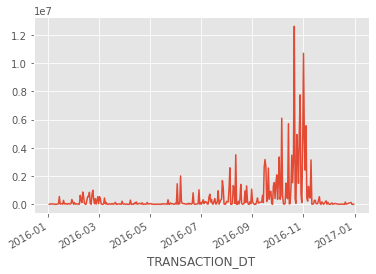

In [50]:
ax = by_date_contr_cl.iloc[:, 0].plot()

ticklabels = by_date_contr_cl.index.strftime('%Y-%m-%d')
plt.show()

#### Contributions made to campaigns - Donald Trump

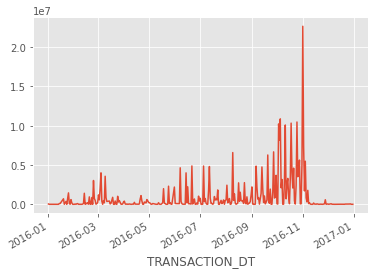

In [51]:
ax = by_date_contr_tr.iloc[:, 0].plot()

ticklabels = by_date_contr_tr.index.strftime('%Y-%m-%d')
plt.show()

<b> Conclusions </b>
> We observe that the most contributions were given to expenditures of both two candidates were made in the last month before the elections started. The amount of money was given to them in one day had overcome the 12 million dollars for H. Clinton and for D. Trump the amount of 20 million \$.

* Now, we will analyze the contributions made by the operating expenditures.

In [52]:
oper_exp = oper[oper['TRANSACTION_AMT'] > 0]
oper_exp = oper_exp[oper_exp['TRANSACTION_DT'].notna()]
oper_exp = oper_exp[oper_exp['TRANSACTION_DT'].str.contains('2016')]

#convert the column 'TRANSACTION_DT' to date format
oper_exp['TRANSACTION_DT'] = pd.to_datetime(oper_exp['TRANSACTION_DT'])

print(oper_exp.shape)
oper_exp.head(5)

(1086403, 25)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
293388,C00301838,N,2016,12P,201603039009643027,17,F3,SB,"ARISTOTLE INTERNATIONAL, INC.",WASHINGTON,DC,200031164,2016-01-21,500.0,P2016,SOFTWARE AND SUPPORT,NaN,NaN,NaN,NaN,ORG,4030420161276067750,1053182,BAFF0A7A0E2174E2EB31,NaN
293389,C00301838,N,2016,12P,201603039009643028,17,F3,SB,HAMILTON COUNTY REPUBLICAN PARTY,CINCINNATI,OH,45202,2016-01-28,250.0,P2016,LINCOLN DAY DINNER AD,NaN,NaN,NaN,NaN,COM,4030420161276067751,1053182,B19ED1BC9D90B41EDA41,NaN
293393,C00301838,N,2016,12P,201603039009643025,17,F3,SB,MT. AIRY PROPERTIES,CINCINNATI,OH,45239,2016-01-04,1421.0,P2016,RENT,NaN,NaN,NaN,NaN,ORG,4030420161276067742,1053182,B27436FA8FA1845B28A0,NaN
293394,C00301838,N,2016,12P,201603039009643025,17,F3,SB,HARRIS DISTRIBUTING,CINCINNATI,OH,45232,2016-01-04,450.0,P2016,STORAGE PAYMENT,NaN,NaN,NaN,NaN,ORG,4030420161276067743,1053182,BF7AC39DA8E9741F6A52,NaN
293395,C00301838,N,2016,12P,201603039009643025,17,F3,SB,HAMILTON COUNTY REPUBLICAN PARTY,CINCINNATI,OH,45202,2016-01-06,680.0,P2016,LINCOLN DAY DINNER TICKETS,NaN,NaN,NaN,NaN,COM,4030420161276067744,1053182,BE04F13706EFA4E3E867,NaN


* Group by date and sum the amount spent by each one of the campaigns. 

In [53]:
opexp_date = oper_exp.groupby(['TRANSACTION_DT'])['TRANSACTION_AMT'].sum().to_frame()
opexp_date

,TRANSACTION_AMT
TRANSACTION_DT,
2016-01-01,4036276.83
2016-01-02,2891018.91
2016-01-03,420264.88
2016-01-04,32651266.13
2016-01-05,9414291.59
...,...
2016-12-27,1699717.78
2016-12-28,2011001.74
2016-12-29,5535652.88


* Plot the above dataframe in order to see in which date the most money was spent from PACs or the committees to expenditures.

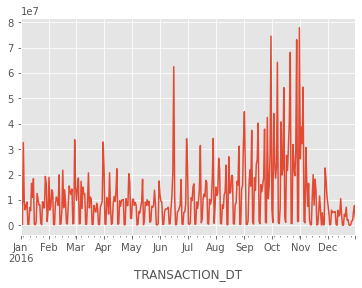

In [54]:
ax = opexp_date['TRANSACTION_AMT'].plot()

ticklabels = opexp_date.index.strftime('%Y-%m-%d')
plt.show()

* We can infer from the above plot that most of the money were made by the expenditures at near mid June 2016 and at the last month of the elections (October to November 2016). The amount of money were spent was huge and we can obseve from the plot that at some days of the last month of the elections were spent above 80 million \$ (this is confirmed with the plots were given in the introduction taken from the FEC website). <br /> But, let's look more closely the money that were spent depending on the party each committee was belonged to.

In [55]:
#group by 'Committee ID' and 'Transaction Date' summing then each amount
opexp = oper_exp.groupby(['CMTE_ID', 'TRANSACTION_DT'])['TRANSACTION_AMT'].sum()
opexp = opexp.to_frame().reset_index()
opexp

,CMTE_ID,TRANSACTION_DT,TRANSACTION_AMT
0,C00000422,2016-01-31,2273.38
1,C00000422,2016-02-29,2595.73
2,C00000422,2016-03-31,1418.36
3,C00000422,2016-04-30,1742.14
4,C00000422,2016-05-31,2152.93
...,...,...,...
234766,C99002396,2016-10-10,277.62
234767,C99002396,2016-10-31,19.54
234768,C99002396,2016-11-08,534.46
234769,C99002396,2016-12-05,19.64


* Then, we join the above dataframe with the one that contains the contributions from committees or independent expenditure to candidates.

In [56]:
opexp1 = pd.merge(opexp, 
               ctc_data[['CMTE_ID', 'CAND_NAME']], 
               on='CMTE_ID', 
               how='inner')
opexp1 = opexp1.drop_duplicates()
print(opexp1.shape)
opexp1.head(5)

(36809, 4)


,CMTE_ID,TRANSACTION_DT,TRANSACTION_AMT,CAND_NAME
0,C00000935,2016-01-03,4651.06,"TRUMP, DONALD J. / MICHAEL R. PENCE"
183,C00000935,2016-01-04,34584.90,"TRUMP, DONALD J. / MICHAEL R. PENCE"
366,C00000935,2016-01-05,63238.32,"TRUMP, DONALD J. / MICHAEL R. PENCE"
549,C00000935,2016-01-06,8272.59,"TRUMP, DONALD J. / MICHAEL R. PENCE"
732,C00000935,2016-01-07,10408.38,"TRUMP, DONALD J. / MICHAEL R. PENCE"


In [57]:
opexp1_date = opexp1.groupby(['CAND_NAME', 'TRANSACTION_DT'])['TRANSACTION_AMT'].sum().to_frame()
opexp1_date

TRANSACTION_AMT
CAND_NAME                                       TRANSACTION_DT                 
CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE 2016-01-01            183138.51
                                                2016-01-02             58795.37
                                                2016-01-03             31286.89
                                                2016-01-04           1582997.08
                                                2016-01-05            758982.29
...                                                                         ...
TRUMP, DONALD J. / MICHAEL R. PENCE             2016-12-27            420781.22
                                                2016-12-28            673769.11
                                                2016-12-29            500878.35
                                                2016-12-30           1694771.10
                                                2016-12-31            608322.73

[732 rows x 1 columns]

In [58]:
by_date_exp = opexp1_date.pivot_table(index='TRANSACTION_DT', columns= 'CAND_NAME', values='TRANSACTION_AMT', aggfunc='sum')
by_date_exp_cl = by_date_exp.iloc[:, 0].to_frame().dropna()
by_date_exp_tr = by_date_exp.iloc[:, 1].to_frame().dropna()
print(by_date_exp_cl)
print(by_date_exp_tr)

                CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE
TRANSACTION_DT                                                 
2016-01-01                                            183138.51
2016-01-02                                             58795.37
2016-01-03                                             31286.89
2016-01-04                                           1582997.08
2016-01-05                                            758982.29
...                                                         ...
2016-12-27                                            211365.11
2016-12-28                                            796515.46
2016-12-29                                            815694.98
2016-12-30                                           1790364.59
2016-12-31                                            232256.94

[366 rows x 1 columns]
                TRUMP, DONALD J. / MICHAEL R. PENCE 
TRANSACTION_DT                                      
2016-01-01                            

#### Money spent for expenditures - Hillary Clinton 

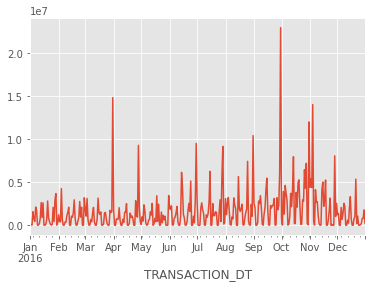

In [59]:
ax = by_date_exp_cl.iloc[:, 0].plot()

ticklabels = by_date_exp_cl.index.strftime('%Y-%m-%d')
plt.show()

#### Money spent for expenditures - Donald Trump

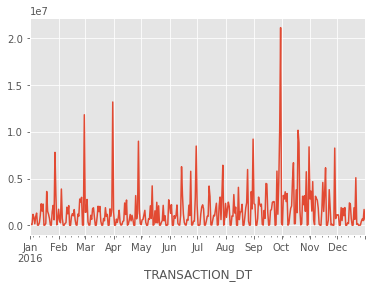

In [60]:
ax = by_date_exp_tr.iloc[:, 0].plot()

ticklabels = by_date_exp_tr.index.strftime('%Y-%m-%d')
plt.show()

<b>Conclusions</b>
> From the above two plots we can conclude that both the expenditures of the two candidates preferred to spend their majority of their money at the first days of the October 2016. The amount of the money made by the campaigns of D. Trump were slightly above 20 million dollars and of H. Clinton were nearly 25 million \$. It is worth mentioning that totally, the campaigns for D. Trump spend through the 2016 more money than those of H. Clinton. Also, as far as the fisrt candidate is concerned, his expenditures have many more peaks through the 2016 than those of H. Clinton.

>4. Identify the biggest recipients of campaign expenditures.

* We used the dataset for 'Operating expenditures', but we only selected the columns we are most interested for.

In [61]:
rec = oper[['NAME', 'TRANSACTION_AMT', 'PURPOSE']]
rec = rec[rec['TRANSACTION_AMT'] > 0]
rec = rec.groupby(['NAME', 'PURPOSE'])['TRANSACTION_AMT'].sum().to_frame()
rec.sort_values(by=['TRANSACTION_AMT'], ascending=False).head(10)

,,TRANSACTION_AMT
NAME,PURPOSE,
GMMB,MEDIA BUY,3.005227e+08
BULLY PULPIT INTERACTIVE LLC,ONLINE ADVERTISING,9.233739e+07
GILES-PARSCALE,DIGITAL CONSULTING/ONLINE ADVERTISING,8.826629e+07
AMERICAN MEDIA & ADVOCACY GROUP,PLACED MEDIA,7.417638e+07
OLD TOWNE MEDIA INC,MEDIA BUY,7.243631e+07
AMERICAN EXPRESS,CREDIT CARD PAYMENT,5.357787e+07
STATWARE INC. AND OTHER FIRMS,IN-KIND - CREDIT DONATION TERMS,5.000000e+07
"CONSERVATIVE CONNECTOR, LLC",LIST RENTAL,3.095866e+07
CHAPMAN CUBINE ADAMS + HUSSEY,DIRECT MARKETING,2.667073e+07


In [62]:
rec = rec.groupby(['NAME'])['TRANSACTION_AMT'].sum().to_frame()
rec = rec.sort_values(by=['NAME'], ascending=True)
rec.head(10)

,TRANSACTION_AMT
NAME,
A C,600.00
"ABC, SIGNS",998.00
ALEX,126.00
AMALI,964.20
AMTRAK,374.00
ANEDOT,16400.89
ANIMOTO,79.98
ANNE,350.00
APRIL,30.00


* We did some cleaning, because there were a lot of names written in many different ways.

In [63]:
rec.index = rec.index.str.replace('-', ' ', regex=False).str.replace(',', ' ', regex=False).str.replace('.', ' ', regex=False)
rec.index = rec.index.str.replace('(', '', regex=False).str.replace(')', '', regex=False).str.replace('HEADQUARTERS', 'HQ', regex=False)
rec.index = rec.index.str.replace('^7.*ELEVEN.*CORPORATE.*', '7 ELEVEN INC CORPORATE HQ', regex=True)
rec.index = rec.index.str.replace('^VALENTINE DIRECT MARKETING.*', 'VALENTINE DIRECT MARKETING', regex=True)
rec.index = rec.index.str.replace('INC', '', regex=False)

rec.index = rec.index.str.strip()
rec = rec.groupby(rec.index)['TRANSACTION_AMT'].sum().to_frame().reset_index()

rec.iloc[1520:1530]

,NAME,TRANSACTION_AMT
1520,ACCESS CALIFORNIA SERVICES,500.00
1521,ACCESS DIGITAL CONSULTLING LLC,652.50
1522,ACCESS EVENT SOLUTIONS,5078.35
1523,ACCESS FOOD AND BEVERAGE,136915.75
1524,ACCESS INTELLIGENCE LLC,1725.00
1525,ACCESS NATIONAL BANK,2851.91
1526,ACCESS TELCOM,1446.00
1527,ACCESSIBLE GOURMET,5762.50
1528,ACCESSLINE,1244.05
1529,ACCESSLINE COMMUNICATIONS,65.06


In [64]:
rec_mapping = {
    'BERG GODREY WISE': 'BERG GODFREY WISE'
}

# If no mapping provided, return x
f = lambda x: rec_mapping.get(x, x) 
rec.loc[:, 'NAME'] = rec.loc[:, 'NAME'].map(f)

In [65]:
rec_mapping = {
    'UNITED TAXPAYERS FOR ORANGE COUNTY': 'UNITED TAXPAYERS OF ORANGE COUNTY'
}

# If no mapping provided, return x
f = lambda x: rec_mapping.get(x, x) 
rec.loc[:, 'NAME'] = rec.loc[:, 'NAME'].map(f)

* We take the final dataframe.

In [66]:
rec = rec.groupby(['NAME'])['TRANSACTION_AMT'].sum().to_frame().reset_index().sort_values(by=['TRANSACTION_AMT'], ascending=False).head(10)
rec

,NAME,TRANSACTION_AMT
42635,GMMB,3.335233e+08
15518,BULLY PULPIT INTERACTIVE LLC,1.118983e+08
4420,AMERICAN EXPRESS,9.874373e+07
42124,GILES PARSCALE,9.387613e+07
4578,AMERICAN MEDIA & ADVOCACY GROUP,7.751652e+07
78945,OLD TOWNE MEDIA,7.712983e+07
101635,STATWARE AND OTHER FIRMS,5.000000e+07
70350,MENTZER MEDIA SERVICES,4.718053e+07
81894,PAYCHEX,4.179394e+07
2132,ADP,4.006650e+07


<b> Conclusions </b>
> From the above investigation on the recipients of the campaigns we can observe that the money that were spent in each one of those organizations were a lot of hundreds of million dollars. In the first table that was created and contained some of the main recipients we can also see that the purpose of the money was mostly on media and on marketing. Moreover, we should mention that in the FEC, the names of most of the recipients were wrong and that is why we have many differences between the first and final table.

>5. Examine the geographical distribution, at the state level, of campaign expenditures. For each state, calculate the expenditures per voter. This will require that you find a source with the number of registered voters per state. Examine the situation for swing states.

* First, we should find a source with registered voters per state. So, we found through 'Google' search machine this __[Reporting Voted & Registration](https://www2.census.gov/programs-surveys/cps/tables/p20/580/table04a.xlsx)__ from the __[United States Census](https://www.census.gov/en.html)__, a website from the U.S. government. 
* After that, we downloaded the file, edit it a little with Microsoft Excel and then with pandas we took the columns and the rows we wanted for.

In [67]:
st_vot = pd.read_excel('pop_per_state.xlsx')
st_vot.head(5)

,STATE,Total Population,Total Citizen Population,Total registered,Percent registered\n(Total),Margin of Error 1,Percent registered\n(Citizen),Margin of Error 1.1,Total voted,Percent voted\n(Total),Margin of Error 1.2,Percent voted\n(Citizen),Margin of Error 1.3
0,UNITED STATES,245502,224059,157596,64.1935,0.29761,70.3369,0.29680,137537,56.0226,0.30812,61.3841,0.31636
1,ALABAMA,3717,3651,2526,67.9617,2.50241,69.1816,2.49836,2095,56.3712,2.65954,57.3830,2.67570
2,ALASKA,518,502,358,69.0653,2.64986,71.3036,2.63491,308,59.4061,2.81524,61.3313,2.83672
3,ARIZONA,5196,4585,3145,60.5332,2.24609,68.6090,2.27039,2769,53.2880,2.29268,60.3972,2.39265
4,ARKANSAS,2216,2116,1456,65.6858,2.65021,68.8026,2.64689,1241,56.0106,2.77088,58.6683,2.81331


In [68]:
st_vot = st_vot.iloc[1:, [0,1,3,8]]
#the population was expressed in thousands
st_vot.iloc[:, [1,2,3]] = st_vot.iloc[:, [1,2,3]]*1000
print(len(st_vot.index))
st_vot.head(5)

51


,STATE,Total Population,Total registered,Total voted
1,ALABAMA,3717000,2526000,2095000
2,ALASKA,518000,358000,308000
3,ARIZONA,5196000,3145000,2769000
4,ARKANSAS,2216000,1456000,1241000
5,CALIFORNIA,29894000,16096000,14416000


* We create a dataframe, substitute of the one that contains the operating expenditures. After that, we selected the values that were referred to states, because there were some false values (negative or too small amounts of money).

In [69]:
st_camp = oper[['STATE', 'TRANSACTION_AMT']]
st_camp = st_camp[st_camp['TRANSACTION_AMT'] > 1000]
st_camp = st_camp.groupby(['STATE'])['TRANSACTION_AMT'].sum().to_frame().reset_index()
print(len(st_camp.index))
st_camp.sort_values(by=['TRANSACTION_AMT']).head(10)

83


,STATE,TRANSACTION_AMT
55,NZ,1002.50
21,FF,1250.00
80,X,1325.00
52,NS,1738.44
34,KU,2170.08
25,GB,2311.22
9,AU,2398.00
5,AM,2543.20
70,UK,3299.40
66,SM,3531.78


* In order to combine the data and take the result we want, we had to find the abbreviations of the US states given in this __[Link](https://worldpopulationreview.com/states/state-abbreviations)__.

In [70]:
abbr = pd.read_csv('name-abbr.csv', header =0, names=['NAME', 'STATE'])
print(len(abbr))
abbr.head(5)

50


,NAME,STATE
0,Alaska,AK
1,Arizona,AZ
2,Arkansas,AR
3,California,CA
4,Colorado,CO


* We create the final dataframe by combining the above datasets.

In [71]:
by_state = pd.merge(st_camp, abbr, on='STATE', how='inner')
by_state.head(5)

,STATE,TRANSACTION_AMT,NAME
0,AK,6.412982e+06,Alaska
1,AR,2.334500e+07,Arkansas
2,AZ,2.608698e+07,Arizona
3,CA,2.251615e+08,California
4,CO,4.949528e+07,Colorado


In [72]:
by_state.rename(columns = {'STATE':'CODE', 'NAME':'STATE'}, inplace = True)
#convert the lower letters to upper ones, so as to be the same in both two datasets
by_state['STATE'] = by_state['STATE'].str.upper()
by_state.head(5)

,CODE,TRANSACTION_AMT,STATE
0,AK,6.412982e+06,ALASKA
1,AR,2.334500e+07,ARKANSAS
2,AZ,2.608698e+07,ARIZONA
3,CA,2.251615e+08,CALIFORNIA
4,CO,4.949528e+07,COLORADO


In [73]:
by_state = pd.merge(by_state, st_vot, on='STATE', how='inner')
by_state = by_state[['STATE', 'CODE', 'TRANSACTION_AMT', 'Total Population', 'Total registered', 'Total voted']]
print(len(by_state.index))
by_state.head(5)

50


,STATE,CODE,TRANSACTION_AMT,Total Population,Total registered,Total voted
0,ALASKA,AK,6.412982e+06,518000,358000,308000
1,ARKANSAS,AR,2.334500e+07,2216000,1456000,1241000
2,ARIZONA,AZ,2.608698e+07,5196000,3145000,2769000
3,CALIFORNIA,CA,2.251615e+08,29894000,16096000,14416000
4,COLORADO,CO,4.949528e+07,4242000,2893000,2707000


* Create the 'PER_VOTER' column, which is referring to the amount of money were spent from campaigns for each voter and take the 10 biggest values. 

In [74]:
by_state['PER_VOTER'] = by_state['TRANSACTION_AMT'].div(by_state['Total registered'])
by_state.sort_values(by=['PER_VOTER'], ascending=False).head(10)

,STATE,CODE,TRANSACTION_AMT,Total Population,Total registered,Total voted,PER_VOTER
6,DISTRICT OF COLUMBIA,DC,9.811936e+08,553000,420000,380000,2336.175298
44,VIRGINIA,VA,6.649484e+08,6343000,4399000,3973000,151.158983
19,MARYLAND,MD,1.589242e+08,4623000,3114000,2737000,51.035394
29,NEW HAMPSHIRE,NH,3.169283e+07,1044000,763000,698000,41.537130
5,CONNECTICUT,CT,7.115189e+07,2759000,1763000,1586000,40.358416
10,HAWAII,HI,1.712857e+07,1064000,530000,460000,32.318063
38,RHODE ISLAND,RI,1.584917e+07,836000,538000,464000,29.459432
30,NEW JERSEY,NJ,1.223410e+08,6862000,4165000,3665000,29.373586
17,LOUISIANA,LA,5.451162e+07,3463000,2446000,2067000,22.286028
33,NEW YORK,NY,2.004235e+08,15506000,9142000,7869000,21.923381


* Finally, from __[Wikipedia](https://en.wikipedia.org/wiki/Swing_state)__ we extract the swing states both in 2012 and in 2016. These states are those that their final result is unstable, because generally the majority of citizens do not lean to a certain party. (methodology created by __[Nate Silver](https://en.wikipedia.org/wiki/Nate_Silver)__). \
<i> * We take the swing states in 2012, because that was the last elections before 2016. </i> 

In [75]:
swing2012 = pd.DataFrame(data=['WISCONSIN', 'NEVADA', 'IOWA', 'NEW HAMPSHIRE', 'PENNSYLVANIA', 'COLORADO', 'VIRGINIA', 'OHIO', 'FLORIDA', 'NORTH CAROLINA', 'GEORGIA'], columns=['STATE'])
swing2012

,STATE
0,WISCONSIN
1,NEVADA
2,IOWA
3,NEW HAMPSHIRE
4,PENNSYLVANIA
5,COLORADO
6,VIRGINIA
7,OHIO
8,FLORIDA
9,NORTH CAROLINA


In [76]:
swing2012 = pd.merge(by_state, swing2012, on='STATE', how='inner')
swing2012[['STATE', 'PER_VOTER']].sort_values(by=['PER_VOTER'], ascending=False)

,STATE,PER_VOTER
9,VIRGINIA,151.158983
5,NEW HAMPSHIRE,41.537130
8,PENNSYLVANIA,18.687278
0,COLORADO,17.108634
3,IOWA,16.714086
7,OHIO,14.882623
1,FLORIDA,13.314643
6,NEVADA,10.107569
2,GEORGIA,6.850727
10,WISCONSIN,6.000664


In [77]:
swing2016 = pd.DataFrame(data=['MAINE', 'NEVADA', 'MINNESOTA', 'NEW HAMPSHIRE', 'MICHIGAN', 'PENNSYLVANIA', 'WISCONSIN', 'FLORIDA', 'ARIZONA', 'NORTH CAROLINA', 'GEORGIA'], columns=['STATE'])
swing2016 = pd.merge(by_state, swing2016, on='STATE', how='inner')
swing2016[['STATE', 'PER_VOTER']].sort_values(by=['PER_VOTER'], ascending=False)

,STATE,PER_VOTER
7,NEW HAMPSHIRE,41.537130
9,PENNSYLVANIA,18.687278
1,FLORIDA,13.314643
4,MICHIGAN,11.225782
5,MINNESOTA,11.061695
8,NEVADA,10.107569
0,ARIZONA,8.294746
2,GEORGIA,6.850727
3,MAINE,6.356330
10,WISCONSIN,6.000664


<b> Conclusions </b>
> From the above tables we can observe that most money per voter (or to be more clear per registrated voter) were spent in the District of Columbia (2,336.18 \$), then to the Virginia state (151,16 \\$) and later on at the Maryland state with bigger gap than the previous one (51.04 \\$). \
After examining the swing states in both 2012 and 2016 we can see that instead of being all of them in the top 10 or generally in high places, the opposite is happenning. Only in the two of them, the amount of money were spent was pretty high (Virginia: 151,16 \\$ and New Hampshire: 41.54\\$); in 2012, while the rest of them are located at very low places in the final classification. In 2016 only the New Hampshire state is called again swing state and is located in the top 10s of the money spent per voter. <br />
This is very peculiar and may happenned, because the candidates probably alread knew the swing states, so they did not invented too much on them. Also, some of the states were overpopulated and they had many millions citizens in each one of them. So, they spent money on them but proportionally to the voters it was too small corresponding to each one of them.